<font color="navy">

1) explanation for where we got our data, why it's interesting, and what we plan on looking for {basic data import/cleaning}
<br>
2) explanation about patricks model for predicting petition success {models} - model result
<br>
3) basic rundown of words used in petitions, liberal/conservative etc. {barplots}
<br>
4) more in depth explanation of what we're trying to do in predicting political affiliation overall.
<ul>
<li>model 1 explanation {model} results</li>
<li>model 2 explanation {model} resutls</li>
<li>model 3 explanation {model} results</li>
<li>model 4 explanation {model} results</li>
</ul>
<br>
5) is seeing if political affiliation predicts petition success
<br>
6) is a conclusion explaining all the cool things we could theoretically do with these models as regards to trying to determain hidden political bias in the real world. for example, see if we can train the model on pro-russian english language propoganda websites


## An Analysis of Political Bias and the Success of White House Petitions
###### STA 141b Final Project, Winter 2015
###### EDIE ESPEJO {} | GRAHAM SMITH {912355584} | PATRICK VACEK {}




1) explanation for where we got our data, why it's interesting, and what we plan on looking for {basic data import/cleaning} 

It's unlikely to be a controversial sentiment to suggest that we live in an age of perpetual information overload. The days where most Americans would get their news from large, monolithic television networks and print outlets is long past. As of 2016, adults under the age of 50 get roughly half of their news from the internet - the single largest source being facebook<sup><a href="#fn1">[1]</a></sup>. One would have believed that the democritization of information would cause people to regress towards some mean consesnus, which would in an ideal world resemble the truth.
<br><br>
Sadly, this has not been the case. The post-truth, 'alternative facts' ethos of our new Executive branch aside the American public has never been as divided as it is now. While not a perfect proxy, we can look at data involving political polarization and see that more than 60% of people find they have less in common with members of the opposite party after talking to them about politics, and 87% say that their opponents policies are actively dangerous<sup>[2]</sup>. These are not numbers you's see from people simply differeing with each other on values. These are numbers you'd expect to see from people who fundamentally disagreed on what reality they were all living in.
<br><br>
This being said, it is even more critical that everyone become both involved in the political process and active consumers of information - a word here which means to be aware of the source, thoroughness, and intent behind theinformation they're getting. To this end our group created a two part algorithm to represent both of these goals. The first part was the construction of a logistic regression model to predict whether or not a white house petition would hit the 100k threshold necessary for the president to be legally required to respond, based on the rate at which it recieves signatures. Second was to create a classifier for determaining the probability that a particular petition is 'Liberal' or 'Conservative' based on word choice. Finally we brought all three of these together in a generalized algorithm that looks at both signature rate over time and vocabulary to detrmain how likely it is that a petition will succeed.
<br><br>
We believe that it might be possible to generalize our algorithm and use it to, for example, track viral twitter tags and see how likely they are to read a critical mass of popularity. Or alternatively use the political leanings aspect to try and uncover unstated bias in news articles.

# Text Processing
(1) Clean up and tokenize body text
<br>
(2) Clean up title text
<br>
(3) Made new data frame
<br>
(4) Absolute Frequency Vectorization
<br>
(5) More Stop Word Removal
<br>
(6) Random Forest Classification
<br>
(7) Testing on Outside Documents
<br>
(8) Visualization via Plotly

In [1]:
# LIBRARIES
# TEXT PROCESSING
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# DATA SCIENCE
import pandas as pd
import numpy as np

# VISUALIZATION
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# ELSE
from collections import Counter
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
# READ IN DATA
petnlp = pd.DataFrame.from_csv("petnlp.csv")
petnlp.head()

,body,issues,petition_type,title,url,ideology
0,It effects every American in some way. It wil...,"Budget & Taxes, Economy & Jobs, Veterans & Mil...",Change an existing Administration policy,Legalize Marijuana and bring jobs to millions ...,https://petitions.whitehouse.gov/petition/lega...,Liberal
1,"""In the dying days of the Ottoman Empire, unde...","Civil Rights & Equality, Government & Regulato...",Take or explain a position on an issue or policy,Officially Recognize The Armenian Genocide Of ...,https://petitions.whitehouse.gov/petition/offi...,Neutral
2,Walleye are political pawns at Mille Lacs Lake...,"Civil Rights & Equality, Economy & Jobs, Gover...",Change an existing Administration policy,Eliminate Mille Lacs Lake Treaty Management,https://petitions.whitehouse.gov/petition/elim...,Neutral
3,We cannot make America great with so many disa...,"Economy & Jobs, Health Care, Technology & Inno...",Propose a new Administration policy,Take Action to End the Autism Epidemic and Imp...,https://petitions.whitehouse.gov/petition/take...,Conservative
4,Locked up by US Government for 10 Years \r\nIN...,Criminal Justice Reform,Take or explain a position on an issue or policy,Release Kevin Trudeau,https://petitions.whitehouse.gov/petition/rele...,Neutral


<font color="navy">
## (1) Text Clean-Up and Tokenization
We will clean up body text.

In [3]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpText(text, additional_stopwords=[]):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE URLS
    new_text = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*", "", new_text).strip()
    
    # REMOVE PUNCTUATION
    new_text = new_text.translate(None, string.punctuation)
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    #SPLIT
    new_text = new_text.split()
    
    # REMOVE STOPWORDS
    stops = stopwords.words("english") + additional_stopwords
    
    return [word for word in new_text if word not in stops]

In [4]:
# stopwords.words("english")

# new_stops = "President, president, people, without, needs, since, used, get, would, us, united, states, people, american, americans, national, government, petition, make, also, many, must, need, change, ask, use, every, trump, white, house, america, America, executive, Executive"
# new_stops = new_stops.split(", ")

# new_stops+stopwords.words("english")

In [5]:
tokens = [cleanUpText(x) for x in petnlp["body"]]
print tokens[0]

C:\Users\Graham\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


['effects', 'every', 'american', 'way', 'also', 'keep', 'americans', 'funding', 'terrorism', 'drug', 'cartels', 'would', 'bring', 'jobs', 'following', 'industries', 'energy', 'farming', 'housing', 'industrial', 'manufacturing', 'healthcare', 'bring', 'much', 'needed', 'tax', 'dollars', 'fuel', 'military', 'provide', 'better', 'body', 'armor', 'troops', 'fuel', 'america', 'surplus', 'foreign', 'export']


<font color="navy">
## (2) Clean Up Title Text

In [6]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpTitle(text):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    return(new_text)

In [7]:
cleaned_titles = [cleanUpTitle(x) for x in petnlp["title"]]

In [8]:
cleaned_titles[0:5]

['legalize marijuana and bring jobs to millions of americans.',
 'officially recognize the armenian genocide of ',
 'eliminate mille lacs lake treaty management',
 'take action to end the autism epidemic and implement comprehensive reforms of vaccine safety policies',
 'release kevin trudeau']

<font color="navy">
## (3) New Data Frame
I don't know.

In [9]:
blobs = [unicode(" ".join(x), errors="replace") for x in tokens]

In [10]:
blobs = [x.encode("ascii", "replace") for x in blobs]

In [11]:
blobs_df = pd.DataFrame({"title":cleaned_titles, "blobs":blobs, "ideology":petnlp["ideology"]})
blobs_df.head()
# (264, 3)

,blobs,ideology,title
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau


In [12]:
index = blobs_df["ideology"].index[blobs_df["ideology"].apply(pd.isnull)]
index

Int64Index([41], dtype='int64')

In [13]:
# WE HAVE ONE NAN 
print blobs_df["ideology"][41]
print blobs_df["title"][41]
print blobs_df["blobs"][41]

nan
i have evidence of traffic enforcement devices being used unlawfully and in some cases illegally which must be addressed
research amp investigations amp petitions wwwbentcopbiz amp wwwbentcopboardsnet found extensive national global misuse traffic enforcement devices us uk australia likely globally majority hand held devices originate us endorsed us government require matter fully investigating openly amp honestly issues presented unlawfull road markings signage illegal prosecutions inaccuracy misuse hand held speed measuring devices requires open debate discussion dislosure public websites compiled much evidence believe respective governments collaborated use deployment strategies drivers


In [14]:
blobs_df

,blobs,ideology,title
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau
5,dea erroneously classified marijuana schedule ...,Liberal,make marijuana legalization for recreation or ...
6,people request congress create missing veteran...,Neutral,"write new policy, erik jorgensen's law to prev..."
7,approximately youth aged x suffer severe menta...,Liberal,take action to improve screening for mental il...
8,military members active reserve retired vetera...,Neutral,exempt department of defense nonappropriated f...
9,long history white house multiple political pa...,Liberal,we strongly protest exclusion of news orgs. fr...


In [15]:
# HERE IS THE PROBLEM
blobs_df["ideology"].index[blobs_df["ideology"].apply(pd.isnull)]

Int64Index([41], dtype='int64')

In [16]:
# blobs_df = blobs_df.reindex(range(len(blobs_df)))
blobs_df = blobs_df[~pd.isnull(blobs_df["ideology"])]
blobs_df.shape

(263, 3)

In [17]:
blobs_df = blobs_df.reset_index(drop=True)

In [18]:
blobs_df["ideology"][41]

'Conservative'

In [19]:
# blobs_df.to_csv("blobs.csv")

<font color="navy">
## (4) Absolute Frequency Vectorization
Absolute frequencies of words per ideology.

In [20]:
neutral_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["blobs"]])
neutral_counts = Counter(neutral_blobs.split())
neutral_counts.most_common()[0:20]

[('us', 21),
 ('president', 19),
 ('people', 19),
 ('states', 18),
 ('new', 14),
 ('united', 14),
 ('military', 12),
 ('congress', 12),
 ('government', 12),
 ('make', 11),
 ('help', 11),
 ('petition', 10),
 ('state', 10),
 ('law', 9),
 ('trump', 9),
 ('federal', 9),
 ('get', 9),
 ('many', 9),
 ('american', 9),
 ('pr', 9)]

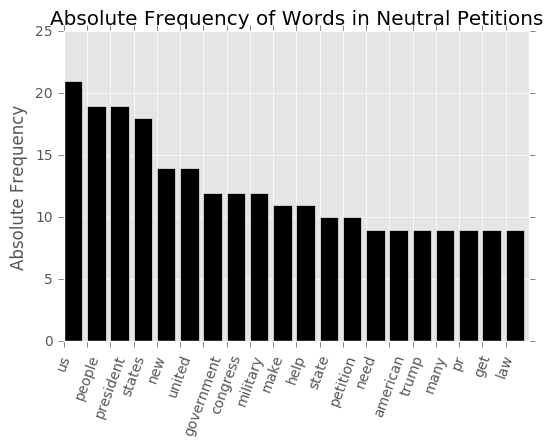

In [21]:
df = pd.DataFrame.from_dict(neutral_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

In [22]:
liberal_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["blobs"]])
liberal_counts = Counter(liberal_blobs.split())
liberal_counts.most_common()[0:20]

[('president', 76),
 ('people', 67),
 ('trump', 62),
 ('us', 62),
 ('states', 56),
 ('order', 46),
 ('united', 46),
 ('american', 45),
 ('national', 39),
 ('executive', 37),
 ('rights', 33),
 ('country', 33),
 ('americans', 32),
 ('climate', 32),
 ('would', 30),
 ('administration', 30),
 ('change', 28),
 ('public', 26),
 ('donald', 25),
 ('petition', 24)]

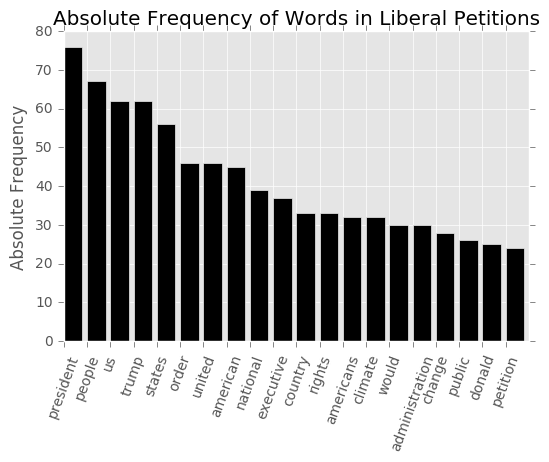

In [23]:
df = pd.DataFrame.from_dict(liberal_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

In [24]:
conservative_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["blobs"]])
conservative_counts = Counter(conservative_blobs.split())
conservative_counts.most_common()[0:20]

[('us', 50),
 ('people', 39),
 ('president', 34),
 ('law', 34),
 ('states', 33),
 ('trump', 27),
 ('state', 27),
 ('united', 26),
 ('government', 22),
 ('amendment', 21),
 ('citizens', 20),
 ('firearms', 20),
 ('petition', 19),
 ('national', 19),
 ('would', 17),
 ('american', 17),
 ('rights', 16),
 ('police', 16),
 ('time', 15),
 ('years', 15)]

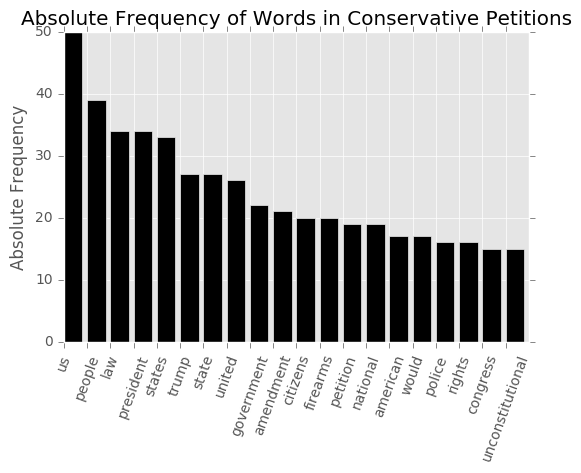

In [25]:
df = pd.DataFrame.from_dict(conservative_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (5) Need to Remove Most Popular Words
We don't want them to all have the same top words.

In [26]:
all_blobs = " ".join([x for x in blobs_df["blobs"]])
all_counts = Counter(all_blobs.split())
# all_counts.most_common()[0:50]

<font color="navy">
I need to make an informed decision on more stop words. I feel strongly that these words do not need to be included in our corpus.
<br>
<br>
<b>New Additions:</b> us, people, american, national, government, petition, make, also, many, must, need, change, ask, use

In [27]:
new_stops = '''
            President, president, people, without, needs, since, used, get, would, us, united, states, 
            people, american, americans, national, government, petition, make, also, 
            many, must, need, change, ask, use, every, trump, white, house, america, America,
            executive, Executive
            '''
new_stops = new_stops.split(", ")

In [28]:
def removeStopWords(text):
    return [word for word in text.split() if word not in new_stops]

In [29]:
new_blobs = [" ".join(removeStopWords(x)) for x in blobs_df["blobs"]]

In [30]:
new_blobs

['effects way keep funding terrorism drug cartels bring jobs following industries energy farming housing industrial manufacturing healthcare bring much needed tax dollars fuel military provide better body armor troops fuel surplus foreign export',
 'dying days ottoman empire cover world war young turk embarked racist strategy xturkificationx multiethnic multireligious empire oneandonehalf million armenians murdered armenian genocide survivors exiled yearold homeland like officially recognize armenian genocide genocide shown recognition former obama promised acknowledge genocide failed',
 'walleye political pawns mille lacs lakewhile natives nonnatives battle reservation boundaries mille lacs lake treaty management lakes resources become quagmire democratic led state department natural resource officials say hands tied mille lacs band officials screaming xfoulx turn result supreme court ruling treaty seven tries ojibwe sought walleye become game piece struggle retain jurisdiction south 

In [31]:
blobs_df["new_blobs"] = new_blobs
blobs_df.head()

,blobs,ideology,title,new_blobs
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...,effects way keep funding terrorism drug cartel...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of,dying days ottoman empire cover world war youn...
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management,walleye political pawns mille lacs lakewhile n...
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...,cannot great many disabled autistic children u...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau,locked years prison exercising constitutional ...


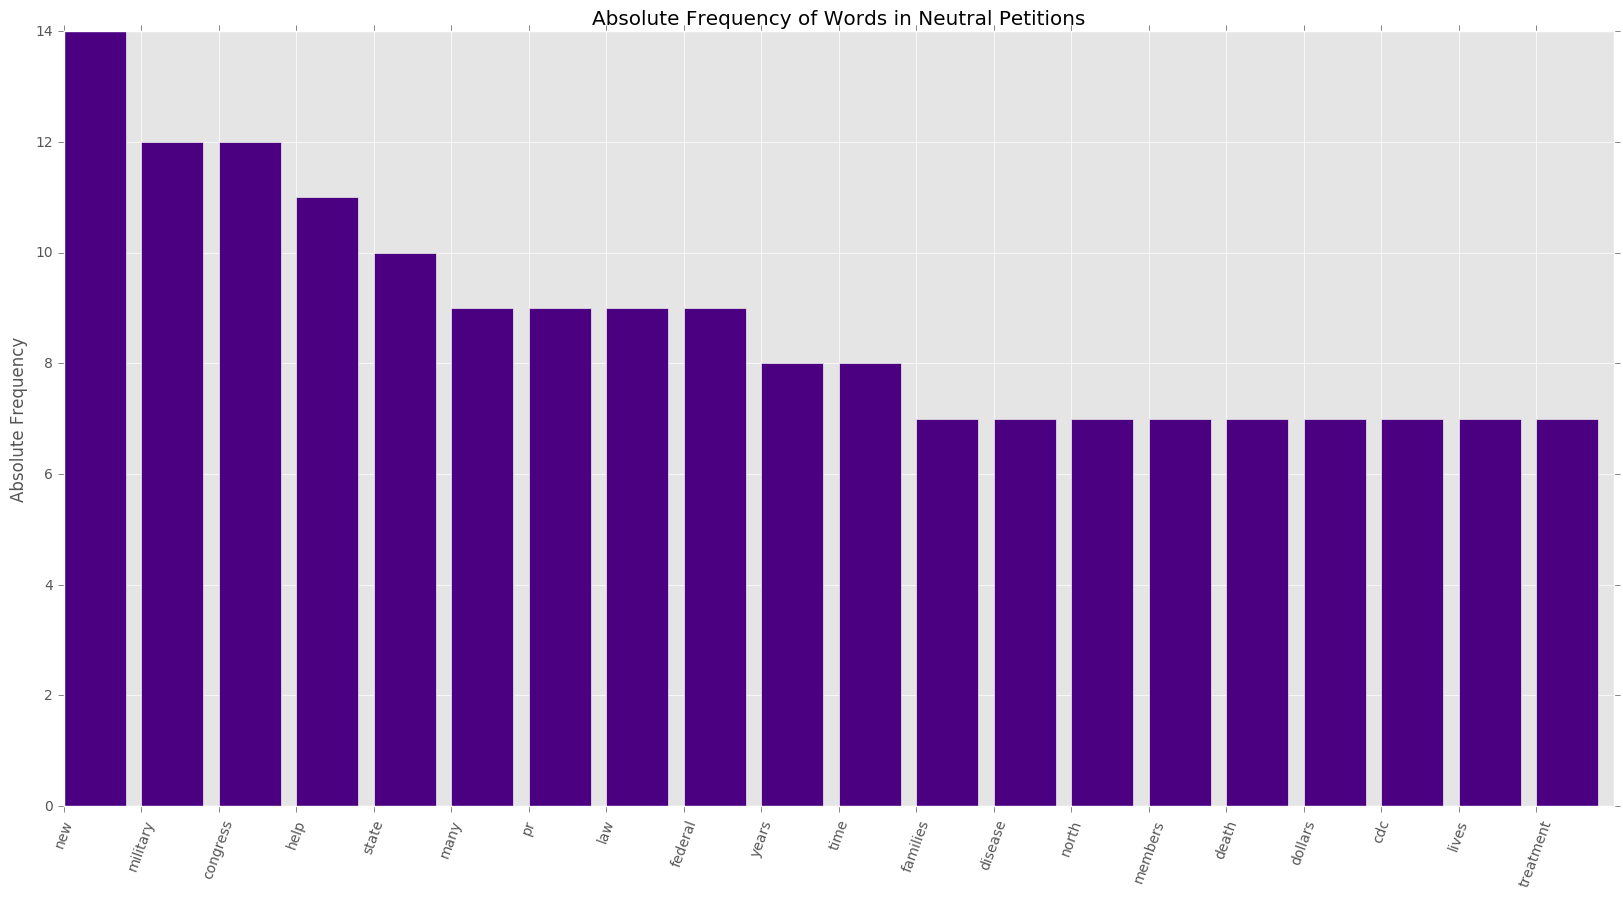

In [32]:
# NEUTRAL WORDS
neutral_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["new_blobs"]])
neutral_counts2 = Counter(neutral_blobs2.split())
neutral_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(neutral_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="indigo")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

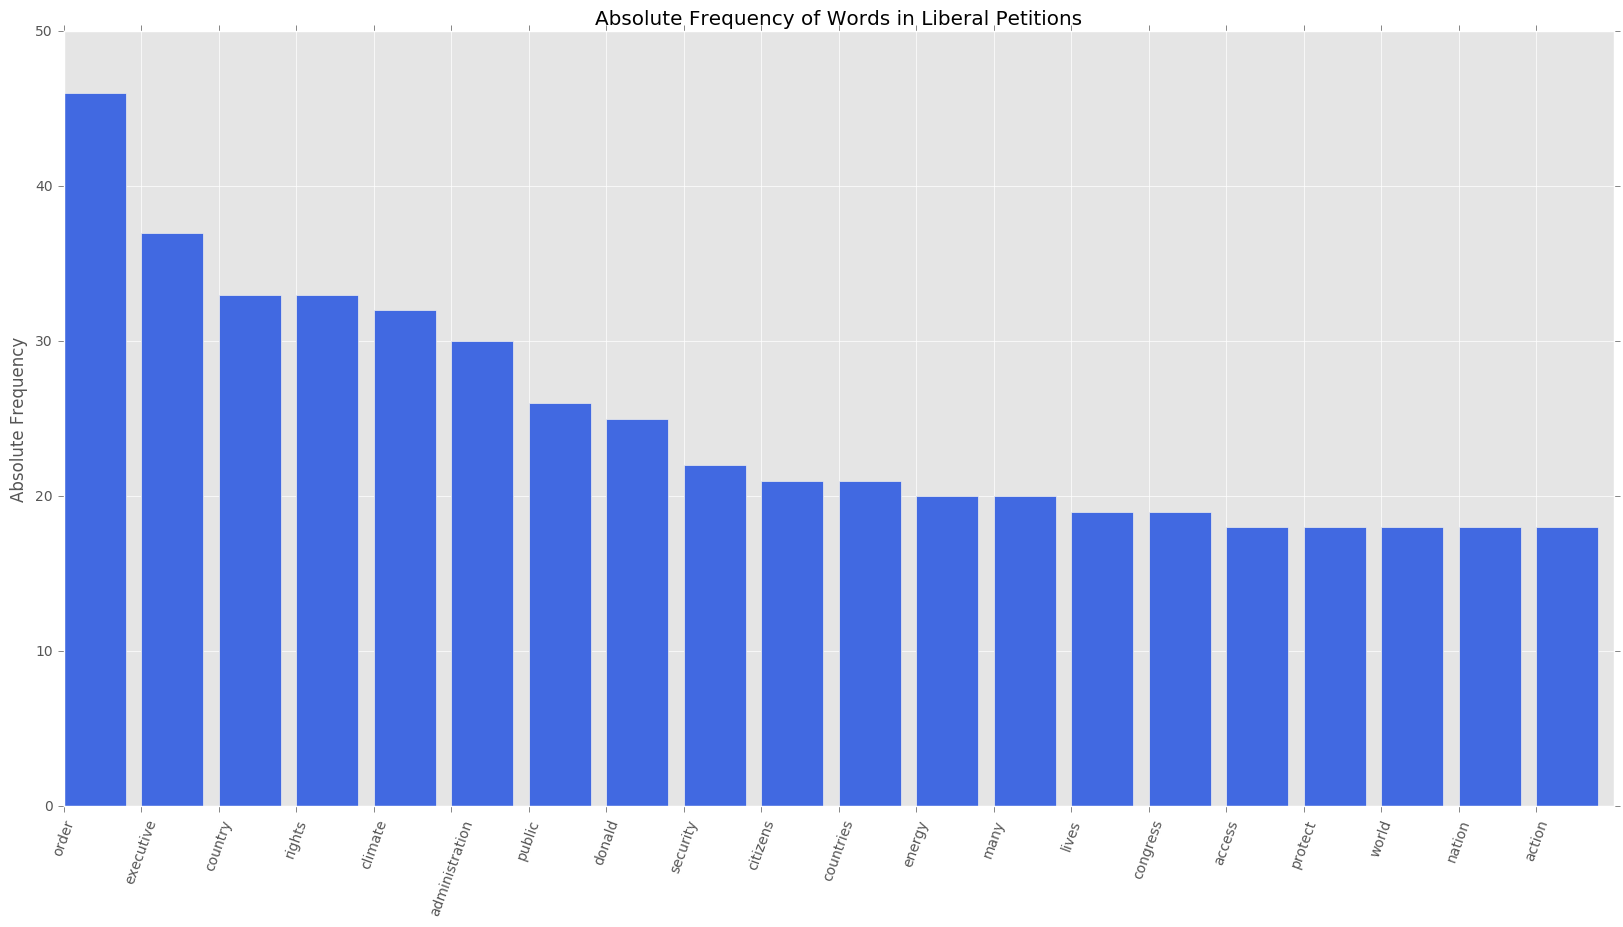

In [33]:
# LIBERAL WORDS
liberal_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["new_blobs"]])
liberal_counts2 = Counter(liberal_blobs2.split())
liberal_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(liberal_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="royalblue")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

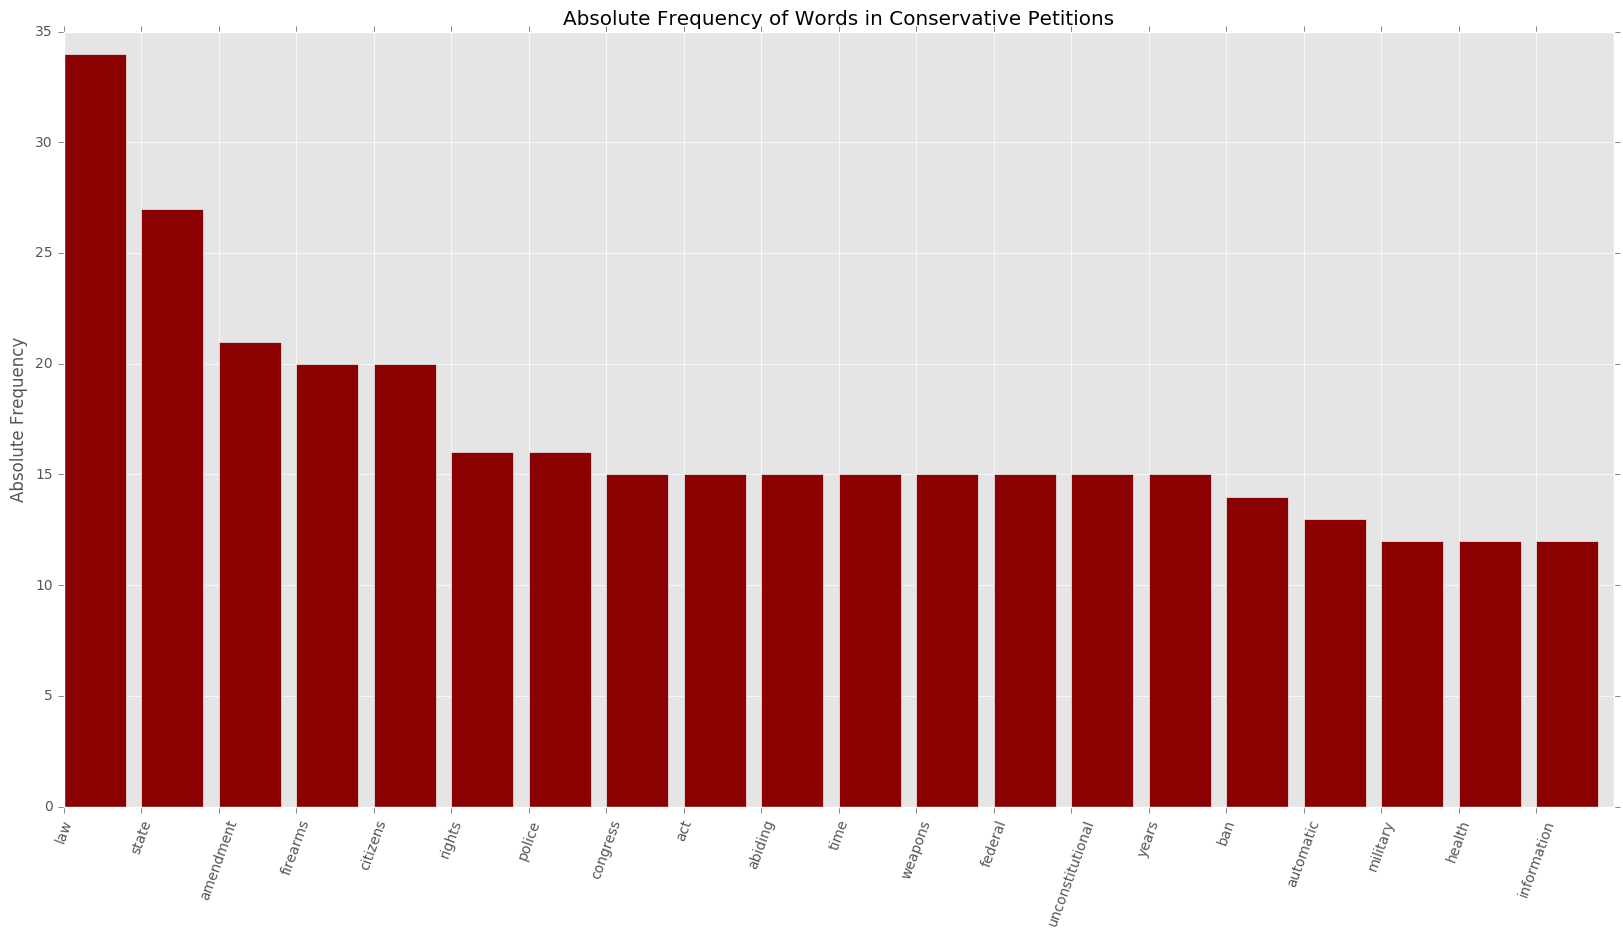

In [34]:
# CONSERVATIVE
conservative_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["new_blobs"]])
conservative_counts2 = Counter(conservative_blobs2.split())
conservative_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(conservative_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="darkred")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (6) Testing Vectorizer Code
Source: https://www.youtube.com/watch?v=AJVP96tAWxw

In [35]:
import random

# USING 80% OF DATA
# pseudo_rando_nums = random.sample(range(0, len(blobs_df)), 210)
# train = pseudo_rando_nums
train = [32, 262, 136, 240, 22, 24, 33, 66, 115, 84, 197, 246, 127, 88, 125, 224, 90, 23, 211, 168, 249, 156, 164, 239, 186, 155, 29, 185, 234, 232, 192, 218, 74, 113, 14, 172, 161, 47, 85, 244, 56, 207, 105, 46, 44, 142, 13, 199, 117, 7, 67, 18, 221, 145, 189, 71, 179, 242, 171, 52, 60, 152, 195, 162, 86, 147, 120, 245, 139, 256, 93, 220, 8, 62, 91, 82, 75, 96, 94, 223, 39, 151, 5, 250, 188, 3, 34, 35, 16, 259, 203, 124, 77, 238, 11, 101, 37, 194, 233, 76, 243, 149, 102, 236, 258, 260, 166, 158, 116, 144, 108, 205, 248, 57, 21, 235, 80, 255, 61, 150, 252, 38, 253, 17, 89, 148, 68, 123, 12, 58, 109, 170, 231, 191, 196, 119, 209, 237, 6, 122, 78, 103, 206, 28, 217, 20, 48, 54, 204, 193, 69, 43, 143, 112, 118, 1, 154, 219, 30, 190, 169, 0, 176, 198, 180, 19, 59, 137, 107, 135, 175, 131, 36, 27, 153, 140, 216, 2, 261, 126, 104, 110, 51, 87, 187, 121, 98, 132, 95, 79, 247, 50, 92, 133, 70, 157, 167, 214, 159, 163, 184, 160, 15, 97, 178, 225, 202, 173, 26, 63]

In [36]:
# VECTORIZING TRAINING DATA
vectorizer = CountVectorizer(analyzer= "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)
train_data_features = vectorizer.fit_transform(blobs_df["new_blobs"][train])
train_data_features = train_data_features.toarray()
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
# GENERATE OUR FOREST
forest = RandomForestClassifier(n_estimators = 100)
our_forest = forest.fit(train_data_features, blobs_df["ideology"][train])

In [38]:
# GET INDICES OF TEST DATA
test = set(range(len(blobs_df))) - set(train)
test = list(test)
print test

[128, 129, 130, 4, 134, 257, 9, 10, 141, 146, 25, 201, 31, 165, 177, 40, 41, 42, 45, 174, 49, 53, 182, 55, 138, 181, 64, 65, 227, 72, 73, 183, 208, 81, 210, 83, 212, 213, 215, 228, 222, 226, 99, 100, 229, 230, 106, 111, 241, 114, 251, 200, 254]


In [39]:
# VECTORIZING TEST DATA
test_data_features = vectorizer.transform(blobs_df["new_blobs"][test])
test_data_features = test_data_features.toarray()
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
# PREDICT
result = forest.predict(test_data_features)

In [41]:
pred_df = pd.DataFrame({"petition":blobs_df["title"][test], "true_ideol":blobs_df["ideology"][test], "pred_ideol":result})
pred_df = pred_df.reindex()

In [42]:
pred_df["correct"] = (pred_df["pred_ideol"] == pred_df["true_ideol"])

In [43]:
# ERROR RATE
len(pred_df[pred_df["correct"]==False])*(len(pred_df)**(-1))

0.3773584905660377

In [44]:
# CONSERVATIVE, LIBERAL, NEUTRAL
predicted_probs = forest.predict_proba(test_data_features)
predicted_probs
# probs_df = pd.DataFrame(predicted_probs)
# probs_df.columns = ["conservative", "liberal", "neutral"]
# probs_df

array([[ 0.09,  0.9 ,  0.01],
       [ 0.09,  0.89,  0.02],
       [ 0.07,  0.92,  0.01],
       [ 0.29,  0.57,  0.14],
       [ 0.22,  0.73,  0.05],
       [ 0.95,  0.04,  0.01],
       [ 0.17,  0.74,  0.09],
       [ 0.21,  0.69,  0.1 ],
       [ 0.24,  0.51,  0.25],
       [ 0.14,  0.69,  0.17],
       [ 0.32,  0.59,  0.09],
       [ 0.13,  0.65,  0.22],
       [ 0.05,  0.86,  0.09],
       [ 0.18,  0.7 ,  0.12],
       [ 0.13,  0.86,  0.01],
       [ 0.23,  0.7 ,  0.07],
       [ 0.29,  0.51,  0.2 ],
       [ 0.43,  0.41,  0.16],
       [ 0.37,  0.46,  0.17],
       [ 0.15,  0.84,  0.01],
       [ 0.28,  0.58,  0.14],
       [ 0.12,  0.88,  0.  ],
       [ 0.4 ,  0.5 ,  0.1 ],
       [ 0.34,  0.55,  0.11],
       [ 0.08,  0.89,  0.03],
       [ 0.1 ,  0.85,  0.05],
       [ 0.32,  0.5 ,  0.18],
       [ 0.18,  0.75,  0.07],
       [ 0.12,  0.8 ,  0.08],
       [ 0.23,  0.67,  0.1 ],
       [ 0.1 ,  0.86,  0.04],
       [ 0.13,  0.82,  0.05],
       [ 0.15,  0.76,  0.09],
       [ 0

In [45]:
conservative = [predicted_probs[x][0] for x in range(len(predicted_probs))]
liberal = [predicted_probs[x][1] for x in range(len(predicted_probs))]
neutral = [predicted_probs[x][2] for x in range(len(predicted_probs))]

In [46]:
pred_df["conservative"] = conservative
pred_df["liberal"] = liberal
pred_df["neutral"] = neutral
pred_df

,petition,pred_ideol,true_ideol,correct,conservative,liberal,neutral
128,donald trump's anti-immigration executive order.,Liberal,Liberal,True,0.09,0.90,0.01
129,remove steve bannon as a member of the nationa...,Liberal,Liberal,True,0.09,0.89,0.02
130,remove steve bannon and restore military and i...,Liberal,Liberal,True,0.07,0.92,0.01
4,release kevin trudeau,Liberal,Neutral,False,0.29,0.57,0.14
134,cancel executive order banning immigration fro...,Liberal,Liberal,True,0.22,0.73,0.05
257,repeal the hughes amendment,Conservative,Conservative,True,0.95,0.04,0.01
9,we strongly protest exclusion of news orgs. fr...,Liberal,Liberal,True,0.17,0.74,0.09
10,immediately give hillarybeattrump.org permanen...,Liberal,Neutral,False,0.21,0.69,0.10
141,stop president trumpxs order to blocks arrival...,Liberal,Liberal,True,0.24,0.51,0.25
146,immediately rescind the executive order on imm...,Liberal,Liberal,True,0.14,0.69,0.17


In [47]:
# pred_df.reset_index().to_csv("predictions.csv")

<font color="navy">
## (7) Bored, so Trying Some Random Stuff
Pulling some stuff off the web.

In [48]:
trump = '''
We will not fail. Our country will thrive and prosper again.
We stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the Earth from the miseries of disease, and to harness the energies, industries and technologies of tomorrow.
A new national pride will stir our souls, lift our sights, and heal our divisions.
It is time to remember that old wisdom our soldiers will never forget: that whether we are black or brown or white, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American Flag.
And whether a child is born in the urban sprawl of Detroit or the windswept plains of Nebraska, they look up at the same night sky, they fill their heart with the same dreams, and they are infused with the breath of life by the same almighty Creator.
So to all Americans, in every city near and far, small and large, from mountain to mountain, and from ocean to ocean, hear these words:
You will never be ignored again.
Your voice, your hopes, and your dreams will define our American destiny. And your courage and goodness and love will forever guide us along the way.
Together, We will make America strong again.
We will make wealthy again.
We will make America proud again.
We will make America safe again.
And yes, together, we will make America great again. Thank you. God bless you. And God bless America.'''

hitler = '''
Democratic ideals are a big topic of discussion right now; not in Germany, but other parts of the world talk about them. We in Germany have learned our lesson with democratic ideals; if the rest of the world praises these ideals, we can only answer that the German people had the chance to live within the purest form of this ideal, and we ourselves are now reaping the legacy left by this democracy. We then get a lecture on the wonderful goals of war, especially from the British side. Great Britain has much experience in proclaiming goals of war, considering they have waged more wars than anyone else. The goals they proclaim today are fantastic: the creation of a new Europe. This Europe will be a just place, and the general equality will make arms unnecessary, so we can all disarm. This disarmament is supposed to kick start a period of economic blossoming, trade and movement should commence, especially trade, much trade, free trade! And from this trade, culture is supposed to bloom, and not just culture, but religion, too. In one phrase: the golden age is supposed to dawn. Unfortunately, this golden age has been described in a very similar fashion on several occasions, and not even by prior generations, but by the same people that are describing it yet again today. It's like a very worn-out groove on an old LP. We should pity these gentlemen, who haven't found a new, big idea to hook the people on, because they promised the same things in 1918: the goal of war then was also a "new Europe" and a "new equality", this new equality whose main element is abolishing a nation's right to self-determination. At that time, an equality that would make arms unnecessary in the future was promised. Thence issued the program of disarmament of everyone. And to make this disarmament especially manifest, it was supposed to be crowned by a union of all disarmed states, which had decided that, in the future, all differences (at least no one doubted there would still be differences) between them should be, well, as it is the custom among democracies, be talked to pieces in open discussions. Under no circumstances should there be any more shooting. And at that time it was already said that the consequences of this disarmament and this worldwide parliament would be an incredible blossoming, a blooming of industry and especially (and much emphasis is always put on this) of trade, of free trade. Culture, as well, should not be disregarded in this process, and while one spoke a little bit less about religion at the end of the war than at the beginning, we at least were told, in the year 1918, that it would be a blessed era that God would smile upon.
'''

matloff = '''
Let me offer three obvious (to me, at least) facts:

No one, even the most extreme Republicans, wants to see people dying in the streets. The federal government does have a role, indeed a responsibility. It’s too big for the states, and even if the feds give them block grants, some states, say in the South, would adopt draconian policies.
Many people, especially the stereotypical Trump supporters, live paycheck to paycheck. Tax breaks, health savings accounts and the like are useless to this large group of people. It’s an insult to offer them such things, a let-them-eat-cake solution.
Obamacare was a bold step that filled a void that desperately needed to be filled. But it was built on various assumptions that apparently were shaky. It is not sustainable in its current form. Already some insurers have withdrawn from certain markets.
The Republicans now are making their own shaky assumptions, e.g. that a 30% penalty, for those who forego insurance but then suddenly need it, is the right “price” for not doing their part to support the system. Really? Why shouldn’t it be 5% or 50%, say? No one knows.
'''


nyt = '''
But a senior White House official said that Donald F. McGahn II, the president’s chief counsel, was working to secure access to what Mr. McGahn believed to be an order issued by the Foreign Intelligence Surveillance Court authorizing some form of surveillance related to Mr. Trump and his associates.

The official offered no evidence to support the notion that such an order exists. It would be a highly unusual breach of the Justice Department’s traditional independence on law enforcement matters for the White House to order it to turn over such an investigative document.

Any request for information from a top White House official about a continuing investigation would be a stunning departure from protocols intended to insulate the F.B.I. from political pressure. It would be even more surprising for the White House to seek information about a case directly involving the president or his advisers, as does the case involving the Russia contacts.
'''

robert_reich = '''
Trump and his White House don’t argue on the merits. They attack the credibility of the institutions that come up with facts and arguments they don’t like. 

They even do it preemptively. Last week, White House press secretary Sean Spicer warned that the nonpartisan Congressional Budget Office couldn’t be trusted to come up with accurate numbers about the costs and coverage of the Republican’s replacement for the Affordable Care Act.

“If you’re looking at the CBO for accuracy, you’re looking in the wrong place,” he said.

So what’s the right place? The Oval Office? 

Bear in mind the director of the CBO is a Republican economist and former George W. Bush administration official who was chosen for his position by the Republican Congress in 2015. 

No matter. The White House is worried about what the CBO will say about Trumpcare, so it throws the CBO under the bus before the bus arrives. 

Trump couldn’t care less about the long-term consequences, but the rest of us should. For more than four decades the U.S. budget process has depended on the CBO’s analyses and forecasts. The office has gained a reputation for honesty and reliability under both Republican and Democratic appointees. Now, it’s tainted. 
'''
nate_silver = '''
This is not to say the election was a toss-up in mid-October, which was one of the high-water marks of the campaign for Clinton. But while a Trump win was unlikely, it should hardly have been unthinkable.1 And yet the Times, famous for its “to be sure” equivocations,2 wasn’t even contemplating the possibility of a Trump victory.3
It’s hard to reread this coverage without recalling Sean Trende’s essay on “unthinkability bias,” which he wrote in the wake of the Brexit vote. Just as was the case in the U.S. presidential election, voting on the referendum had split strongly along class, education and regional lines, with voters outside of London and without advanced degrees being much more likely to vote to leave the EU. The reporters covering the Brexit campaign, on the other hand, were disproportionately well-educated and principally based in London. They tended to read ambiguous signs — anything from polls to the musings of taxi drivers — as portending a Remain win, and many of them never really processed the idea that Britain could vote to leave the EU until it actually happened.

So did journalists in Washington and London make the apocryphal Pauline Kael mistake, refusing to believe that Trump or Brexit could win because nobody they knew was voting for them? That’s not quite what Trende was arguing. Instead, it’s that political experts4 aren’t a very diverse group and tend to place a lot of faith in the opinions of other experts and other members of the political establishment. Once a consensus view is established, it tends to reinforce itself until and unless there’s very compelling evidence for the contrary position. Social media, especially Twitter, can amplify the groupthink further. It can be an echo chamber.

I recently reread James Surowiecki’s book “The Wisdom of Crowds” which, despite its name, spends as much time contemplating the shortcomings of such wisdom as it does celebrating its successes. Surowiecki argues5 that crowds usually make good predictions when they satisfy these four conditions:

Diversity of opinion. “Each person should have private information, even if it’s just an eccentric interpretation of the known facts.”
Independence. “People’s opinions are not determined by the opinions of those around them.”
Decentralization. “People are able to specialize and draw on local knowledge.”
Aggregation. “Some mechanism exists for turning private judgments into a collective decision.”
Political journalism scores highly on the fourth condition, aggregation. While Surowiecki usually has something like a financial or betting market in mind when he refers to “aggregation,” the broader idea is that there’s some way for individuals to exchange their opinions instead of keeping them to themselves. And my gosh, do political journalists have a lot of ways to share their opinions with one another, whether through their columns, at major events such as the political conventions or, especially, through Twitter.

But those other three conditions? Political journalism fails miserably along those dimensions.
'''
abe_lincoln = '''Fourscore and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate-we can not consecrate-we can not hallow-this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us-that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion-that we here highly resolve that these dead shall not have died in vain-that this nation, under God, shall have a new birth of freedom-and that government of the people, by the people, for the people shall not perish from the earth.'''

In [49]:
kuhn = '''
👏🏽👏🏽👏🏽HEY👏🏽👏🏽👏🏽
i hate pleading but please, we have got to stop paying attention to the federal and states' governments' latest outrage--they're going to keep coming, that's the point, to keep us stunned and unable to react--and pay attention to what we can do for the people in our neighborhood because it is getting very bad, very fast. we must start making connections with our neighbors and coworkers, pooling and allocating shared resources among our community to protect the vulnerable, and start forcing accountability from bottom-level local government, because *those* are the things that are going to determine what kind of year 2018 is.

living past 33 is probably the wrong choice overall

one thing you could do if you are concerned about the imminent death of the US poverty relief effort is to call or get in contact with those offices in your area and volunteer while you can, and then continue voluteering after the programs have been exsanguinated; take up collections in your community to fund them, and enlist active help when possible. also, get in contact with local churches, as they'll be the only organized effort at mitigating starvation and homelesness in short order.

It's time to admit that our government has entirely abandoned us. We have to care for each other now, if we care at all, which means first and foremost sharing what we have with those who don't have anything. Pursue this goal actively. Talk to your neighbors, especially those that don't live under rooves.
'''

In [50]:
new_text = [trump, hitler, matloff, nyt, robert_reich, nate_silver, abe_lincoln, kuhn]
new_text_tokens = [cleanUpText(str(x), new_stops) for x in new_text]

C:\Users\Graham\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [51]:
new_text_blobs = [" ".join(x) for x in new_text_tokens]

In [52]:
# new_text_blobs

In [53]:
# VECTORIZING NEW TEXT DATA
new_text__data_features = vectorizer.transform(new_text_blobs)
new_text__data_features = new_text__data_features.toarray()
new_text__data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
# PREDICT NEW TEXT DATA
new_text_result = forest.predict(new_text__data_features)

In [55]:
new_text_result

array(['Conservative', 'Conservative', 'Liberal', 'Liberal', 'Liberal',
       'Liberal', 'Liberal', 'Liberal'], dtype=object)

In [56]:
new_text_predicted_probs = forest.predict_proba(new_text__data_features)
new_text_predicted_probs

array([[ 0.47,  0.33,  0.2 ],
       [ 0.38,  0.35,  0.27],
       [ 0.37,  0.53,  0.1 ],
       [ 0.27,  0.53,  0.2 ],
       [ 0.28,  0.54,  0.18],
       [ 0.34,  0.4 ,  0.26],
       [ 0.33,  0.44,  0.23],
       [ 0.28,  0.42,  0.3 ]])

<font color="navy">
## (8) Visualization
Let's make a ranking.
<br><br>
+1 is very Blue
<br>
0 is Neutral
<br>
-1 is very Red
<br>
<br>
Perhaps we can only use the first two columns and use that as a score.

In [57]:
red = np.array([new_text_predicted_probs[x][0] for x in range(len(new_text_predicted_probs))])
blue = np.array([new_text_predicted_probs[x][1] for x in range(len(new_text_predicted_probs))])

In [58]:
# new_text_ppl = ["trump", "hitler", "matloff", "michaels_nyt", "reich", "silver", "lincoln"]
new_text_ppl = ["trump", "hitler", "matloff", "michaels_nyt", "reich", "silver", "lincoln", "kuhn"]
blue-red

array([-0.14, -0.03,  0.16,  0.26,  0.26,  0.06,  0.11,  0.14])

In [59]:
pd.DataFrame({"person":new_text_ppl, "score":blue-red})

,person,score
0,trump,-0.14
1,hitler,-0.03
2,matloff,0.16
3,michaels_nyt,0.26
4,reich,0.26
5,silver,0.06
6,lincoln,0.11
7,kuhn,0.14


In [60]:
import plotly
import plotly.plotly as py
# plotly.tools.set_credentials_file(username="DEMO", api_key="KEY")

ImportError: No module named plotly

In [ ]:
import matplotlib.pyplot as plt

x = blue-red
y = [0, 0, 0, 0, 0, 0, 0]

fig, ax = plt.subplots()
ax.scatter(x, y, c=x, cmap=plt.cm.RdBu)

ax.set_title("How Red or Blue Are They?")
ax.set_xlabel("Score")

for i in range(len(new_text)):
    xy=(x[i],y[i])
    plt.annotate(new_text_ppl[i], xy)

plot_url = py.plot_mpl(fig, filename="how-red-how-blue")

In [64]:
range(1, 3)

[1, 2]

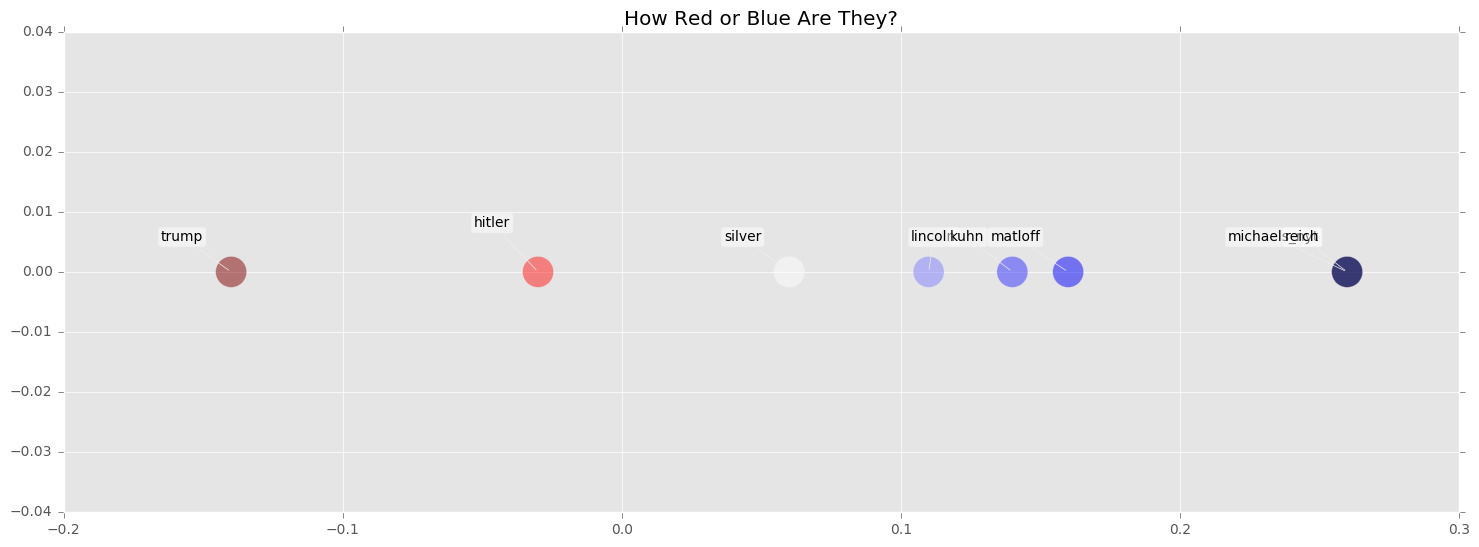

In [61]:
""# USING MATPLOTLIB

plt.rcParams['figure.figsize'] = (18, 6)

x = blue - red
y = [0, 0, 0, 0, 0, 0, 0, 0]
colors = x

plt.subplots_adjust(bottom = 0.1)
plt.scatter(x, y, marker = "o", c=colors, cmap=plt.cm.seismic_r, s=500, alpha=0.5)

for label, x, y in zip(new_text_ppl, x, y):
    if label == "hitler":
        xytext = (-20, 30)
    if label == "lincoln":
        xytext = (20, 20)
    if (label != "lincoln") & (label != "hitler"):
        xytext = (-20, 20)
    plt.annotate(
        label,
        xy=(x, y), xytext=xytext,
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round, pad=0.2', fc="white", alpha=0.5),
        arrowprops=dict(arrowstyle = '-', connectionstyle='arc3, rad=0'))

plt.title("How Red or Blue Are They?")
plt.show()

Sources
<br>
<ol>
    <li><a href="#fn1">http://www.journalism.org/2016/07/07/pathways-to-news/</a></li>
    <li>http://www.people-press.org/2016/06/22/partisanship-and-political-animosity-in-2016/</li>
</ol>